<h1>Exercise 5</h1>

In [65]:
# imports

import pandas as P
import numpy as N
import scipy.stats as S
import statsmodels.stats
from statsmodels.stats import multitest

<h2>1.</h2>

In [66]:
# load original dataframe

org_df = P.read_csv('./e5-data/GDS5037.soft.gz',
    # field separator character
    sep="\t",
    # missing value characters
    na_values=["?"],
    # no row names
    index_col=0,
    # column names
    header=0,
    # quote character
    quotechar="'",
    # skip metadata rows
    skiprows=160,
    skipfooter=1,
    # engine specification
    engine='python')
org_df

,IDENTIFIER,GSM1068478,GSM1068479,GSM1068481,GSM1068482,GSM1068483,GSM1068486,GSM1068487,GSM1068488,GSM1068490,...,GSM1068529,GSM1068530,GSM1068534,GSM1068536,GSM1068541,GSM1068553,GSM1068554,GSM1068558,GSM1068559,GSM1068564
ID_REF,,,,,,,,,,,,,,,,,,,,,
A_23_P100001,FAM174B,11.76500,11.15030,11.82380,10.96300,11.63470,11.07970,11.30700,11.17300,11.01220,...,11.46210,11.13460,11.53310,11.30700,11.03410,10.68630,11.13070,11.19560,11.13110,10.79130
A_23_P100011,AP3S2,6.68845,6.29378,5.77885,6.20746,4.78520,5.38453,5.88975,6.39307,6.00136,...,6.53933,5.77446,5.84170,5.98821,5.76583,5.92124,5.72922,6.91738,6.35952,6.13216
A_23_P100022,SV2B,6.40638,6.53990,2.94554,5.62157,6.12992,5.64204,6.80579,5.74520,6.05809,...,6.06607,5.03564,5.23585,4.78694,2.93856,4.82587,4.44784,5.80114,5.78344,5.36149
A_23_P100056,RBPMS2,1.88171,1.43777,1.47388,1.50057,1.42719,1.41453,1.31007,1.50026,1.58497,...,1.87270,1.42304,1.35702,1.89157,1.98907,2.01289,1.26051,2.84686,1.42486,1.76015
A_23_P100074,AVEN,9.16313,8.79248,9.41351,9.75378,8.85106,9.07236,9.14032,9.32616,9.34733,...,9.71164,9.03423,9.42655,9.18300,9.36121,9.40767,9.31643,9.35973,8.86756,8.94563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E1A_r60_n11,CONTROL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E1A_r60_n9,CONTROL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EQC,CONTROL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# load id files

probes = P.read_csv('./e5-data/51-probes.ids',
    # field separator character
    sep="/s+",
    # column names
    header=None,
    # engine specification
    engine='python')
subjects = P.read_csv('./e5-data/51-subjects.ids',
    # field separator character
    sep="/s+",
    # column names
    header=None,
    # engine specification
    engine='python')
    

In [68]:
# filter main dataframe

filtered_rows = org_df[org_df.index.isin(probes[0])]

df = filtered_rows[subjects[0]]

df

,IDENTIFIER,GSM1068478,GSM1068486,GSM1068492,GSM1068498,GSM1068505,GSM1068512,GSM1068520,GSM1068480,GSM1068501,...,GSM1068458,GSM1068468,GSM1068477,GSM1068467,GSM1068528,GSM1068537,GSM1068543,GSM1068548,GSM1068555,GSM1068562
ID_REF,,,,,,,,,,,,,,,,,,,,,
A_23_P100011,AP3S2,6.68845,5.38453,5.95714,6.62565,5.85951,6.51948,6.20242,5.79675,5.83011,...,7.12339,5.75553,5.64214,6.27389,5.15579,5.77316,6.11452,5.82192,6.33731,5.93867
A_23_P102083,BOLL,1.97507,1.89881,1.44857,1.69616,1.60163,1.91207,1.71371,1.60522,1.61660,...,2.42455,1.58593,1.45788,1.67259,2.70069,1.99203,1.57044,1.64124,1.37187,1.35459
A_23_P104323,MGMT,11.52380,11.63020,11.14170,11.37350,10.95980,10.60660,11.51600,11.18610,11.63130,...,11.39740,11.50270,10.72230,11.38330,11.38810,11.60990,11.03520,10.85900,11.02540,10.60800
A_23_P106562,GALNS,8.87358,9.01956,9.05260,9.18497,9.04968,9.91697,9.06757,8.30869,9.13912,...,9.33799,9.28545,8.87815,8.98356,8.68159,9.16074,9.00078,9.37151,9.68212,9.22344
A_23_P108673,EVA1A,5.77583,6.00798,5.16866,6.25365,6.29386,5.17321,5.69712,5.83384,6.02264,...,5.90490,5.65461,6.35649,6.05526,6.77918,5.60063,5.39887,5.01787,5.87212,5.70212
A_23_P110686,STC2,3.91700,1.79705,2.50514,2.69700,2.40377,1.78748,2.24162,1.33532,1.51518,...,2.32257,2.43956,1.49764,2.37036,1.95730,1.84027,2.72612,2.73855,2.81171,2.08845
A_23_P112646,ABO,4.72813,2.67249,4.45535,3.27857,5.61359,5.59246,5.95840,3.44010,3.11951,...,4.75644,4.46538,5.33450,4.69785,6.11643,5.25429,6.72107,5.26213,5.07250,6.17955
A_23_P115223,HAX1,11.75490,11.88240,11.57160,11.47650,11.48600,11.62510,11.55130,11.74000,11.65120,...,11.36730,11.49740,11.66110,11.28050,11.64760,11.54820,11.85350,11.62330,11.91820,11.63630
A_23_P117582,JDP2,11.45630,11.44010,11.20640,10.56760,10.74180,11.09060,11.06020,11.58590,10.69550,...,10.91200,11.46370,12.10190,11.50070,12.14230,10.96240,10.82910,10.91040,10.95440,10.80400


<h3>1.1.</h3>

In [69]:
# For each subject, calculate the mean expression level over the genes. 
# Do you notice any obvious differences between the subjects?

gene_mean = df.loc[:, df.columns != 'IDENTIFIER'].mean(axis=0)
print(gene_mean)

print('\nThere aren\'t any obvious differences between the subjects')

GSM1068478    7.542535
GSM1068486    7.351364
GSM1068492    7.225399
GSM1068498    7.546109
GSM1068505    7.590863
GSM1068512    7.378594
GSM1068520    7.522257
GSM1068480    7.349102
GSM1068501    7.618670
GSM1068516    7.508493
GSM1068458    7.548477
GSM1068468    7.492289
GSM1068477    7.528315
GSM1068467    7.548450
GSM1068528    7.602219
GSM1068537    7.547033
GSM1068543    7.490493
GSM1068548    7.527154
GSM1068555    7.465526
GSM1068562    7.610374
dtype: float64

There aren't any obvious differences between the subjects


<h3>1.2.</h3>

In [70]:
# For each probe, calculate the mean expression level over the subjects.
# Do you notice any obvious differences between the probes?

sub_mean = P.Series(df.loc[:, df.columns != 'IDENTIFIER'].mean(axis=1),
                    name='sub_mean')
print(sub_mean)

print('\nThere are obvious differences between the probes')

df = P.merge(df, sub_mean, on='ID_REF')
df

ID_REF
A_23_P100011     6.039319
A_23_P102083     1.739160
A_23_P104323    11.228080
A_23_P106562     9.091581
A_23_P108673     5.824867
A_23_P110686     2.219179
A_23_P112646     4.890992
A_23_P115223    11.610360
A_23_P117582    11.169150
A_23_P119617     9.018067
A_23_P121716     9.735072
A_23_P124084     9.119484
A_23_P126613     7.079437
A_23_P12884      7.355830
A_23_P130948     1.560550
A_23_P133146    11.141010
A_23_P135079     8.843013
A_23_P137634     3.109135
A_23_P139704    10.610100
A_23_P14184      8.609328
Name: sub_mean, dtype: float64

There are obvious differences between the probes


,IDENTIFIER,GSM1068478,GSM1068486,GSM1068492,GSM1068498,GSM1068505,GSM1068512,GSM1068520,GSM1068480,GSM1068501,...,GSM1068468,GSM1068477,GSM1068467,GSM1068528,GSM1068537,GSM1068543,GSM1068548,GSM1068555,GSM1068562,sub_mean
ID_REF,,,,,,,,,,,,,,,,,,,,,
A_23_P100011,AP3S2,6.68845,5.38453,5.95714,6.62565,5.85951,6.51948,6.20242,5.79675,5.83011,...,5.75553,5.64214,6.27389,5.15579,5.77316,6.11452,5.82192,6.33731,5.93867,6.039319
A_23_P102083,BOLL,1.97507,1.89881,1.44857,1.69616,1.60163,1.91207,1.71371,1.60522,1.61660,...,1.58593,1.45788,1.67259,2.70069,1.99203,1.57044,1.64124,1.37187,1.35459,1.739160
A_23_P104323,MGMT,11.52380,11.63020,11.14170,11.37350,10.95980,10.60660,11.51600,11.18610,11.63130,...,11.50270,10.72230,11.38330,11.38810,11.60990,11.03520,10.85900,11.02540,10.60800,11.228080
A_23_P106562,GALNS,8.87358,9.01956,9.05260,9.18497,9.04968,9.91697,9.06757,8.30869,9.13912,...,9.28545,8.87815,8.98356,8.68159,9.16074,9.00078,9.37151,9.68212,9.22344,9.091581
A_23_P108673,EVA1A,5.77583,6.00798,5.16866,6.25365,6.29386,5.17321,5.69712,5.83384,6.02264,...,5.65461,6.35649,6.05526,6.77918,5.60063,5.39887,5.01787,5.87212,5.70212,5.824867
A_23_P110686,STC2,3.91700,1.79705,2.50514,2.69700,2.40377,1.78748,2.24162,1.33532,1.51518,...,2.43956,1.49764,2.37036,1.95730,1.84027,2.72612,2.73855,2.81171,2.08845,2.219179
A_23_P112646,ABO,4.72813,2.67249,4.45535,3.27857,5.61359,5.59246,5.95840,3.44010,3.11951,...,4.46538,5.33450,4.69785,6.11643,5.25429,6.72107,5.26213,5.07250,6.17955,4.890992
A_23_P115223,HAX1,11.75490,11.88240,11.57160,11.47650,11.48600,11.62510,11.55130,11.74000,11.65120,...,11.49740,11.66110,11.28050,11.64760,11.54820,11.85350,11.62330,11.91820,11.63630,11.610360
A_23_P117582,JDP2,11.45630,11.44010,11.20640,10.56760,10.74180,11.09060,11.06020,11.58590,10.69550,...,11.46370,12.10190,11.50070,12.14230,10.96240,10.82910,10.91040,10.95440,10.80400,11.169150


<h3>1.3.</h3>

In [71]:
# How many probes are there with a mean greater than 10.0?
# Which genes do they correspond to?

count = df.loc[(sub_mean > 10), 'IDENTIFIER'].size
genes = df.loc[(sub_mean > 10), 'IDENTIFIER']
print(f'There are {count} probes with a mean greater than 10.0\n')
print(f'The corresponding genes are \n{genes}')

There are 5 probes with a mean greater than 10.0

The corresponding genes are 
ID_REF
A_23_P104323     MGMT
A_23_P115223     HAX1
A_23_P117582     JDP2
A_23_P133146    H2AFZ
A_23_P139704    DUSP6
Name: IDENTIFIER, dtype: object


<h2>2.</h2>

In [72]:
# load id files

probes2 = P.read_csv('./e5-data/52-probes.ids',
    # field separator character
    sep="/s+",
    # column names
    header=None,
    # engine specification
    engine='python')
control = P.read_csv('./e5-data/52-control.ids',
    # field separator character
    sep="/s+",
    # column names
    header=None,
    # engine specification
    engine='python')
asthma = P.read_csv('./e5-data/52-asthma.ids',
    # field separator character
    sep="/s+",
    # column names
    header=None,
    # engine specification
    engine='python')

In [73]:
# filter main dataframe

filtered_rows2 = org_df[org_df.index.isin(probes2[0])]

df2_control_id = filtered_rows2[control[0]]
df2_control = df2_control_id.loc[:, df2_control_id.columns != 'IDENTIFIER']

df2_asthma = filtered_rows2[asthma[0]]

# dataframe with identifier column
df2_with_id = P.merge(df2_control_id, df2_asthma, on='ID_REF')

# dataframe without identifier column
df2 = df2_with_id.loc[:, df2_with_id.columns != 'IDENTIFIER']

df2_with_id

,IDENTIFIER,GSM1068458,GSM1068459,GSM1068460,GSM1068461,GSM1068462,GSM1068463,GSM1068464,GSM1068465,GSM1068466,...,GSM1068556,GSM1068557,GSM1068558,GSM1068559,GSM1068560,GSM1068561,GSM1068562,GSM1068563,GSM1068564,GSM1068565
ID_REF,,,,,,,,,,,,,,,,,,,,,
A_23_P100355,PPP4C,9.73450,9.82071,10.38230,10.43700,10.37030,10.59030,10.48990,10.76750,10.57110,...,10.94870,10.28070,10.21060,10.48320,10.67700,10.76620,10.75330,10.59410,10.63990,10.53500
A_23_P101829,LPAR2,7.34121,8.00249,7.17964,7.53055,7.10362,7.07410,6.69177,7.37524,7.49978,...,7.18555,7.18596,7.50311,7.61950,7.35386,7.63585,7.29750,7.18897,7.11162,7.49630
A_23_P102235,SNRPG,12.12020,12.31900,12.42870,12.23300,12.14920,12.22640,12.16290,12.19920,12.26940,...,12.28210,12.28820,12.29720,12.35510,12.30030,12.24170,12.40860,12.05510,12.23110,12.02790
A_23_P102607,CHD6,7.07051,6.91728,7.16459,6.19421,6.86695,6.84001,7.34184,7.09113,6.87948,...,7.20520,7.04128,6.85812,6.87079,7.12792,6.55122,6.75280,7.29706,7.01142,6.79003
A_23_P102743,TRMT6,7.31329,6.38099,7.14409,6.72997,7.03673,6.75132,6.62888,6.63785,6.87825,...,6.98354,7.11257,6.91354,7.21952,6.96467,6.99149,6.88292,6.80598,7.04567,6.81248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A_32_P80255,DDX6,9.72013,9.20204,8.81502,9.55290,9.88867,9.22377,9.70530,9.14508,9.19637,...,9.53174,9.59771,9.75629,9.44850,9.54217,9.48188,9.00412,9.22302,9.81349,9.51958
A_32_P83784,ARAP2,9.33227,8.47086,9.01771,9.30044,8.65403,8.70030,8.26453,8.52626,8.62973,...,8.59478,8.24108,8.50516,8.47277,8.62158,8.80231,8.72801,8.87190,8.61916,8.55743
A_32_P902988,MATN1,6.90708,8.63739,6.96754,7.68574,8.46000,8.44160,9.05813,9.64739,7.50242,...,8.96406,9.65092,12.11820,8.48703,9.87380,11.01930,10.15100,8.71636,11.18370,9.48001


<h2>2.1.</h2>

There are no obvious visible differences between the subjects or the groups


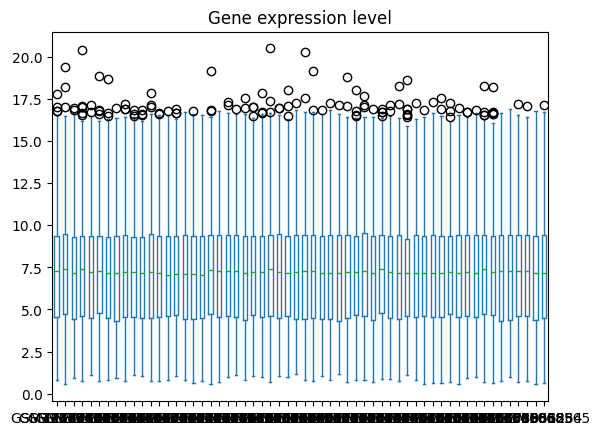

In [74]:
# box plot for all subjects

df2.plot.box(title='Gene expression level')

print('There are no obvious visible differences between the subjects or the groups')

<h2>2.2.</h2>

In [75]:
# Use a T-test to find differentially expressed genes 
# (i.e. probes for which the means are different between the control 
# and asthma groups).

# create Series element of p-values

p_values_list = []

for i in range(793):
    p_values_list.append(S.ttest_ind(df2_control.iloc[i], df2_asthma.iloc[i])[1])

p_values = P.Series(p_values_list)
p_values

0      0.075914
1      0.036554
2      0.007868
3      0.908704
4      0.255610
         ...   
788    0.258446
789    0.685398
790    0.002612
791    0.524207
792    0.002192
Length: 793, dtype: float64

In [76]:
# Adjust the p-values with the Benjamini-Hochberg method

corrected_p_values_list = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
corrected_p_values = P.Series(corrected_p_values_list)

<h2>2.3.</h2>

<Axes: title={'center': 'Unadjusted p-values'}, ylabel='Frequency'>

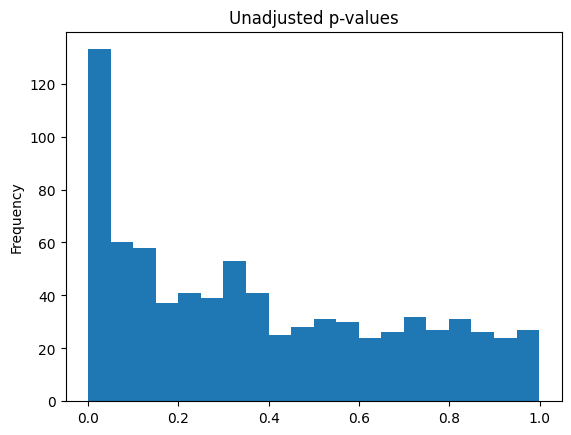

In [77]:
# Create histograms of the unadjusted and adjusted p-values

p_values.plot.hist(title='Unadjusted p-values', bins=20)

<Axes: title={'center': 'Adjusted p-values'}, ylabel='Frequency'>

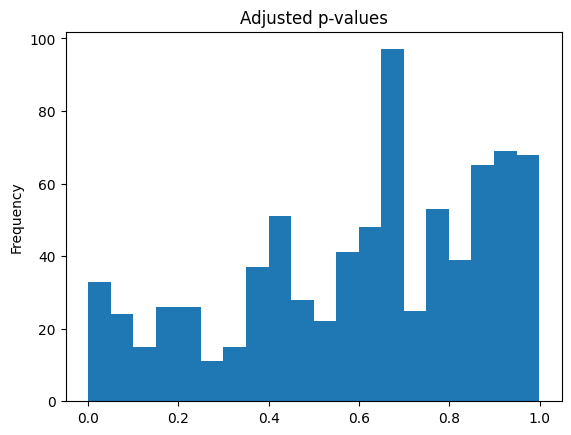

In [78]:
corrected_p_values.plot.hist(title='Adjusted p-values', bins=20)

<p>They differ because Benjamini-Hochberg correction
decreases false discovery rate. It reduces the randomness
of small p-values appearing by chance</p>

<h2>2.4.</h2>

In [79]:
# How many differentially expressed genes 
# (i.e. statistically significant differences) 
# are there at the false discovery rate of 0.05?

print(f'There are {(corrected_p_values < 0.05).sum()} differentially expressed genes.')

There are 33 differentially expressed genes.


<h2>2.5.</h2>

In [80]:
# Sort the adjusted p-values in ascending order.
# Which genes do the first ten probes correspond to?

corrected_p_values = corrected_p_values.sort_values()

indexes = corrected_p_values.index[0:10]

different_genes_rows = df2_with_id.iloc[indexes]

different_genes = different_genes_rows['IDENTIFIER']
different_genes

ID_REF
A_23_P208030     SYT4
A_24_P301501    CCL15
A_24_P91566      BMP7
A_23_P13914     DHX37
A_24_P86240     BMP2K
A_24_P40907     PLPP6
A_23_P251132    SNTG2
A_32_P7721       RORA
A_23_P51958      NBL1
A_24_P260371    PARM1
Name: IDENTIFIER, dtype: object

<h2>3.</h2>

In [81]:
# load dataframe

df3 = P.read_csv('./e5-data/53-data.csv',
           # field separator character
           sep=",",
           # missing value characters
           na_values=["?"],
           # no row names
           index_col=False,
           # no column names
           header=0,
           # quote character
           quotechar="'")
df3

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja,year,month,day,weekday
0,999,1608,699,1287,646,2017,11,10,4
1,328,377,110,266,267,2017,11,11,5
2,316,474,252,564,228,2017,11,12,6
3,1149,1753,888,1537,730,2017,11,13,0
4,1246,1825,812,1505,787,2017,11,14,1
...,...,...,...,...,...,...,...,...,...
1617,2611,4373,2337,3397,2773,2022,6,15,2
1618,2569,4438,2212,3223,2579,2022,6,16,3
1619,2400,3971,1827,2979,2674,2022,6,17,4
1620,600,979,342,566,1110,2022,6,18,5


<h3>3.1.</h3>

In [82]:
# For each weekday (Monday - Sunday), 
# calculate the mean daily number of cyclists for each street.

weekday_means_df = P.DataFrame(index=['Monday', 'Tuesday', 
                              'Wednesday', 'Thursday',
                              'Friday', 'Saturday', 'Sunday'],
                              columns=[df3.columns[0:5]])

for i in range(5):
    for j in range(7):
        mean = round(df3.loc[(df3.weekday == j), df3.columns[i]].mean(),1)
        weekday_means_df.iloc[[j],[i]] = mean

weekday_means_df

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja
Monday,1226.8,2379.0,1226.7,1939.7,1107.8
Tuesday,1280.7,2454.7,1237.8,2001.7,1092.7
Wednesday,1291.3,2486.9,1212.2,1965.7,1093.9
Thursday,1265.6,2451.1,1153.9,1891.7,1077.5
Friday,1129.9,2199.5,976.4,1613.9,1031.5
Saturday,773.0,1434.7,659.7,1225.4,824.6
Sunday,658.2,1259.2,782.8,1349.1,680.4


<Axes: title={'center': 'Average cyclist in Helsinki'}, ylabel='Cyclists'>

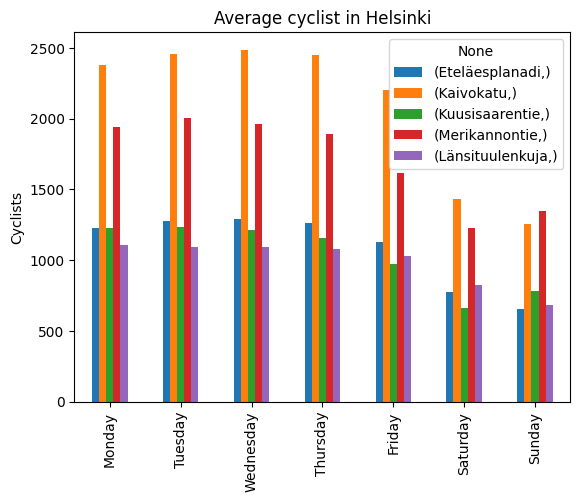

In [83]:
# Plot the means as a bar plot.

weekday_means_df.plot.bar(title='Average cyclist in Helsinki', ylabel='Cyclists')

<h3>3.2.</h3>

In [84]:
# For each month (January - December),
# calculate the mean daily number of cyclists for each street.

month_means_df = P.DataFrame(index=['Jan', 'Feb', 'Mar', 'Apr',
                              'May', 'Jun', 'Jul','Aug', 'Sep', 
                              'Oct','Nov', 'Dec'],
                              columns=[df3.columns[0:5]])

for i in range(5):
    for j in range(12):
        mean = round(df3.loc[(df3.month == j+1), df3.columns[i]].mean(),1)
        month_means_df.iloc[[j],[i]] = mean

month_means_df

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja
Jan,264.6,580.2,295.4,469.4,468.4
Feb,203.6,548.2,287.2,407.6,433.8
Mar,310.9,781.6,455.1,646.6,608.6
Apr,1067.6,2010.7,1157.6,1819.7,956.9
May,1881.6,3249.6,1728.7,2969.6,1292.0
Jun,2246.5,3752.1,2013.8,3437.8,1691.7
Jul,1512.1,3410.9,1563.3,2885.6,1268.8
Aug,2095.7,4152.6,2010.9,3152.6,1532.3
Sep,1681.8,3351.1,1546.0,2369.0,1373.3
Oct,1211.4,2271.5,990.0,1586.5,1125.4


<Axes: title={'center': 'Average cyclist in Helsinki'}, ylabel='Average cyclists per day'>

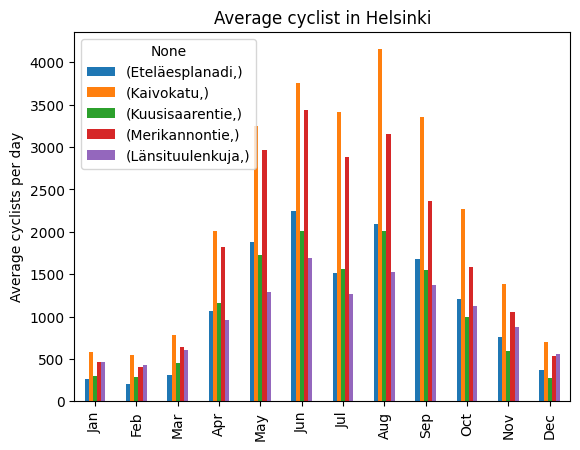

In [102]:
# Plot the means as a bar plot.

month_means_df.plot.bar(title='Average cyclist in Helsinki', ylabel='Average cyclists per day')

<h3>3.3.</h3>

In [94]:
# Calculate the Spearman's correlation coefficient and 
# create a scatter plot for each pair of streets.

# Sprearman's correlations

df_corr = df3.iloc[:, 0:5].corr(method='spearman')
df_corr

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja
Eteläesplanadi,1.000000,0.892638,0.892009,0.896663,0.664733
Kaivokatu,0.892638,1.000000,0.950914,0.962023,0.635698
Kuusisaarentie,0.892009,0.950914,1.000000,0.979178,0.597560
Merikannontie,0.896663,0.962023,0.979178,1.000000,0.599511
Länsituulenkuja,0.664733,0.635698,0.597560,0.599511,1.000000


array([[<Axes: xlabel='Eteläesplanadi', ylabel='Eteläesplanadi'>,
        <Axes: xlabel='Kaivokatu', ylabel='Eteläesplanadi'>,
        <Axes: xlabel='Kuusisaarentie', ylabel='Eteläesplanadi'>,
        <Axes: xlabel='Merikannontie', ylabel='Eteläesplanadi'>,
        <Axes: xlabel='Länsituulenkuja', ylabel='Eteläesplanadi'>],
       [<Axes: xlabel='Eteläesplanadi', ylabel='Kaivokatu'>,
        <Axes: xlabel='Kaivokatu', ylabel='Kaivokatu'>,
        <Axes: xlabel='Kuusisaarentie', ylabel='Kaivokatu'>,
        <Axes: xlabel='Merikannontie', ylabel='Kaivokatu'>,
        <Axes: xlabel='Länsituulenkuja', ylabel='Kaivokatu'>],
       [<Axes: xlabel='Eteläesplanadi', ylabel='Kuusisaarentie'>,
        <Axes: xlabel='Kaivokatu', ylabel='Kuusisaarentie'>,
        <Axes: xlabel='Kuusisaarentie', ylabel='Kuusisaarentie'>,
        <Axes: xlabel='Merikannontie', ylabel='Kuusisaarentie'>,
        <Axes: xlabel='Länsituulenkuja', ylabel='Kuusisaarentie'>],
       [<Axes: xlabel='Eteläesplanadi', ylabel=

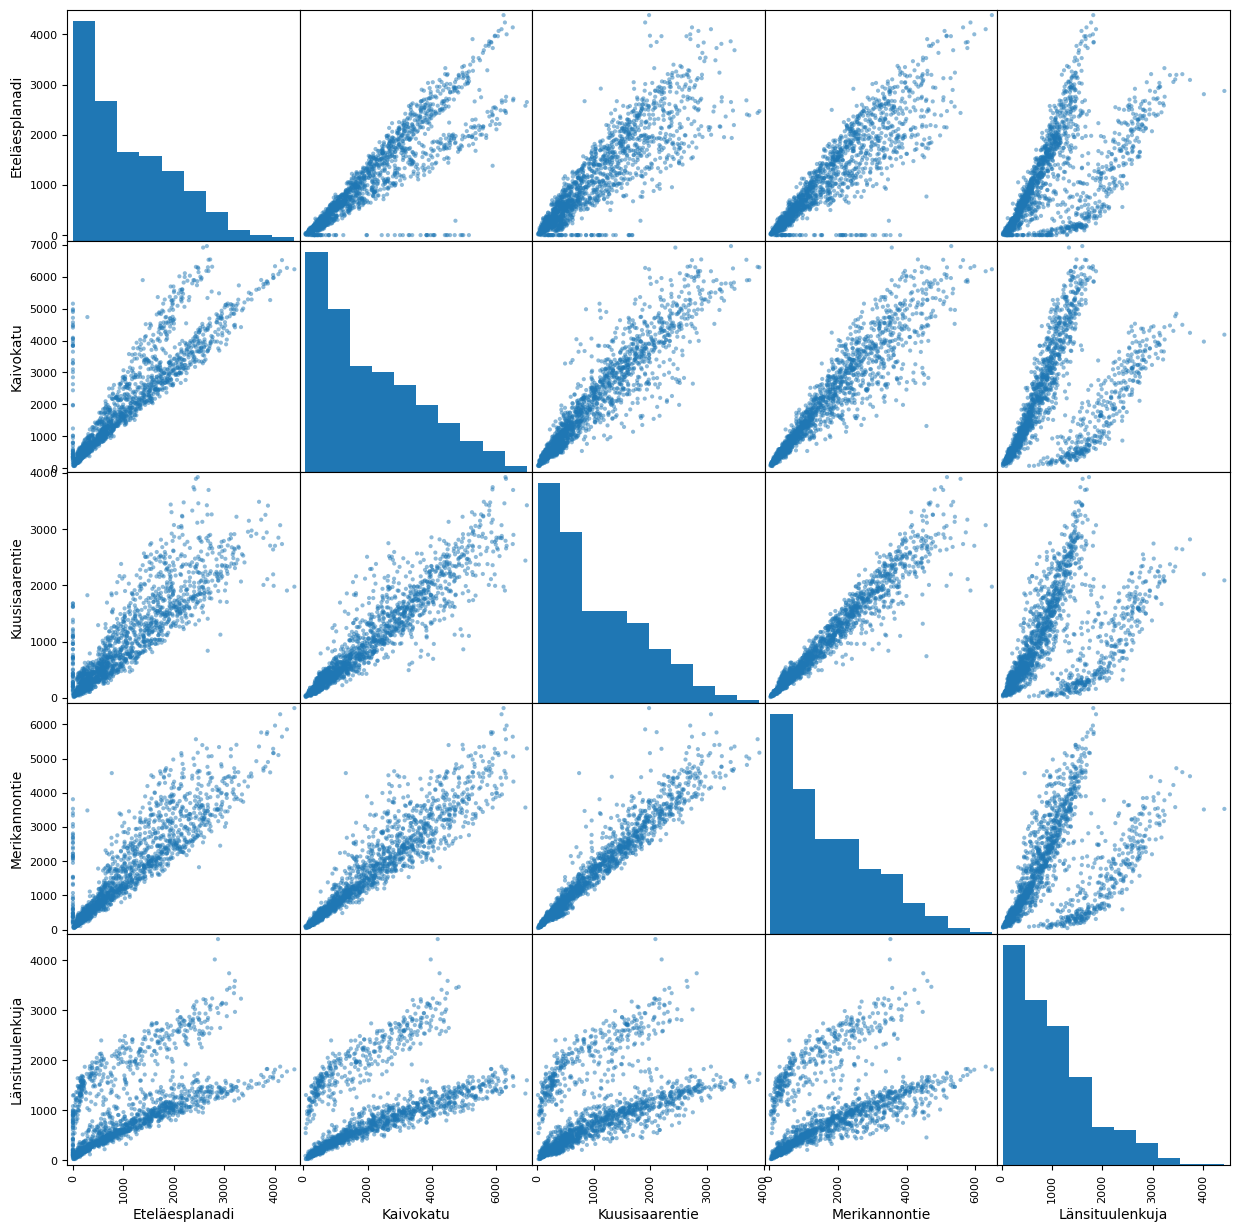

In [101]:
# scatter plots

P.plotting.scatter_matrix(df3.iloc[:, 0:5], figsize=(15,15))



<p>The bar plots reveal that Kaivokatu and Merikannontie are the most used streets, Kaivokatu even more so. They also reveal that there are significantly more cyclists in the warmer months and more at weekdays (Monday - Friday) than at weekends (Saturday - Sunday).</p>
<p>The scatter plots reveal that there is significant correlation between the usage of streets. This means that when one street is used more the other ones are as well. There is an intresting phenomenon with Länsituulenkuja. It isn't as strongly correlated to the other streets and the scatter plot divides into two. It seems something has happened that has increased or decreased the usage of Länsituulenkuja, maybe a roadwork or something. There also could be a change in data gathering that could explain this phenomenon.</p>

<h2>4.</h2>

In [103]:
# load data files

df4_i = P.read_csv('./e5-data/54-image.csv',
           # field separator character
           sep=",",
           # missing value characters
           na_values=["?"],
           # no row names
           index_col=False,
           # no column names
           header=0,
           # quote character
           quotechar="\"")


In [104]:
df4_v = P.read_csv('./e5-data/54-video.csv',
           # field separator character
           sep=",",
           # missing value characters
           na_values=["?"],
           # no row names
           index_col=False,
           # no column names
           header=0,
           # quote character
           quotechar="\"")


In [90]:
# Is there statistical evidence to claim 
# that the total amount spent by customers 
# is different if they click on image advertisements 
# than on video advertisements?

# normality tests

print(S.shapiro(df4_i['amount_spent']))
print(S.shapiro(df4_v['amount_spent']))

ShapiroResult(statistic=0.8109121918678284, pvalue=1.2337129744448977e-14)
ShapiroResult(statistic=0.832206666469574, pvalue=6.508249885198159e-13)


In [91]:
print('Neither vectors are normally distributed')

Neither vectors are normally distributed


In [92]:
# Let's use Mann-Whitney U test with alpha level 0.05
# to determine if there is statistically significatn difference
# between spending encouraged by image and video advertising.

S.mannwhitneyu(df4_i['amount_spent'], df4_v['amount_spent'])

MannwhitneyuResult(statistic=18727.0, pvalue=0.10522752647898526)

<p>There is no evidence to reject null hypothesis (F1 = F2) and we can conclude that there is no statistically significant difference between spending after being exposed to image vs. video advertising.</p>